In [1]:
# system imports
import numpy as np
import os
import torch
import torchaudio
import matplotlib.pyplot as plt

In [2]:
# custom imports
from extract_logspec import get_logspec

In [3]:
# set macros
PWD = os.getcwd()
DATA_DIR = os.path.join(os.path.dirname(PWD), 'data', 'ASVspoof2017')
LABEL_DIR = os.path.join(os.path.dirname(PWD), 'data', 'ASVspoof2017', 'protocol_V2')
DEVICE = torch.device('cpu')

In [14]:
# extract feat and record feat dim (257 is a fixed dim, not tracked)
feat_len = {
    'train': [],
    'dev': [],
    'eval': []
}
cnt = 0
for ds in ('train', 'dev', 'eval'):
    label_file = os.path.join(LABEL_DIR, ds+'.txt')
    f_label = open(label_file, 'r')
    for line in f_label:
        item = line.strip().split(' ')
        audio_path = os.path.join(DATA_DIR, ds, item[0])
        # note that this logspec has not been expanded or transposed
        logspec = get_logspec(audio_path=audio_path, device=DEVICE)
        feat_len[ds].append(logspec.shape[0])
    f_label.close()
        


In [26]:
# check total number of data/feat
# train: 3014; dev: 1710; eval: 13306
print("train set total count: {}".format(len(feat_len['train'])))
print("dev set total count: {}".format(len(feat_len['dev'])))
print("eval set total count: {}".format(len(feat_len['eval'])))

train set total count: 3014
dev set total count: 1710
eval set total count: 13306


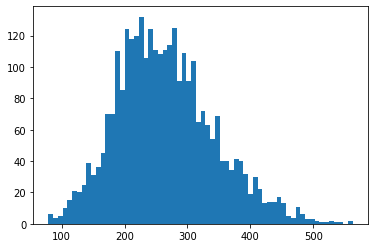

In [43]:
plt.hist(feat_len['train'], bins=64)
plt.savefig('/home/ndmobilecomp/efficient_spoof/efficient-voice-antispoof/plot/train_set.png', format='png')

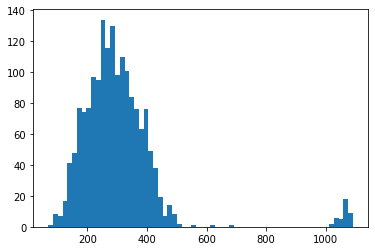

In [44]:
plt.hist(feat_len['dev'], bins=64)
plt.savefig('/home/ndmobilecomp/efficient_spoof/efficient-voice-antispoof/plot/dev_set.png', format='png')

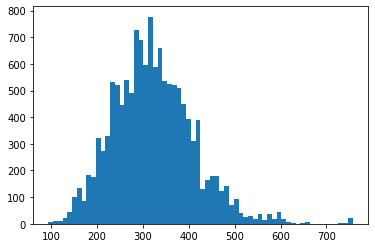

In [45]:
plt.hist(feat_len['eval'], bins=64)
plt.savefig('/home/ndmobilecomp/efficient_spoof/efficient-voice-antispoof/plot/eval_set.png', format='png')